In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display, HTML
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing/sample_submission.csv
/kaggle/input/housing/data_description.txt
/kaggle/input/housing/train.csv
/kaggle/input/housing/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/housing/train.csv")

In [3]:
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')
display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
categorical_features = df.select_dtypes(include=[object])
summary_stats = categorical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'categorical_features', 'Summary statistics for categorical features')
display(HTML(html_numerical))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [5]:
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


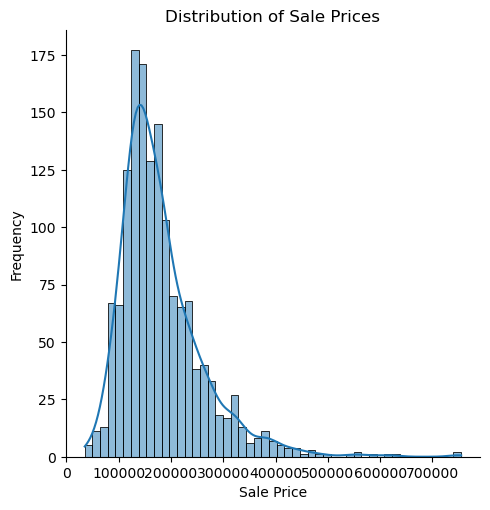

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'SalePrice' is the column with your target variable
sns.displot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [8]:
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

In [9]:
# Calculate average sale price by zoning
average_prices = df.groupby('MSZoning')['SalePrice'].mean().reset_index()

# Create the bar plot using Plotly
fig = px.bar(average_prices, x='MSZoning', y='SalePrice',  text='$' + average_prices['SalePrice'].round(2).astype(str))

# Set plot style
fig.update_traces(marker_color='orange', textposition='outside', textfont=dict(size=12, color='orange'))

# Set plot layout
fig.update_layout(title_text='Average Sale Price by Zoning', title_font=dict(size=16, color='green'),
                  paper_bgcolor='black', plot_bgcolor='black', font=dict(color='white'))

# Show the plot
fig.show()

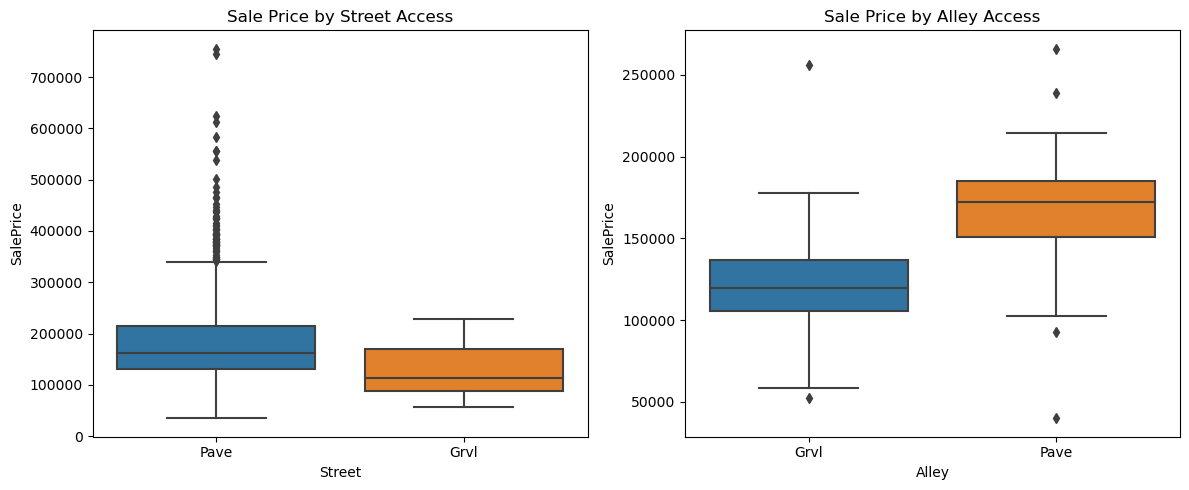

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='Street', y='SalePrice', ax=ax[0])
ax[0].set_title('Sale Price by Street Access')

sns.boxplot(data=df, x='Alley', y='SalePrice', ax=ax[1])
ax[1].set_title('Sale Price by Alley Access')

plt.tight_layout()
plt.show()

In [11]:
colors = px.colors.qualitative.Plotly

shape_prices = df.groupby('LotShape')['SalePrice'].mean()
contour_prices = df.groupby('LandContour')['SalePrice'].mean()
# Shape Prices
fig1 = px.bar(x=shape_prices.index, y=shape_prices.values, title='Average Sale Price by Property Shape',
              template='plotly_dark', text=shape_prices.values)

fig1.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig1.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig1.update_xaxes(title='Property Shape')
fig1.update_layout(showlegend=False)

# Contour Prices
fig2 = px.bar(x=contour_prices.index, y=contour_prices.values, title='Average Sale Price by Property Contour',
              template='plotly_dark', text=contour_prices.values)

fig2.update_traces(marker_color=colors, texttemplate='$%{text:,.0f}', textposition='outside')
fig2.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig2.update_xaxes(title='Property Contour')
fig2.update_layout(showlegend=False)

fig2.show()
fig2.show()

Correlation between Property Age and Sale Price: -0.5228973328794968


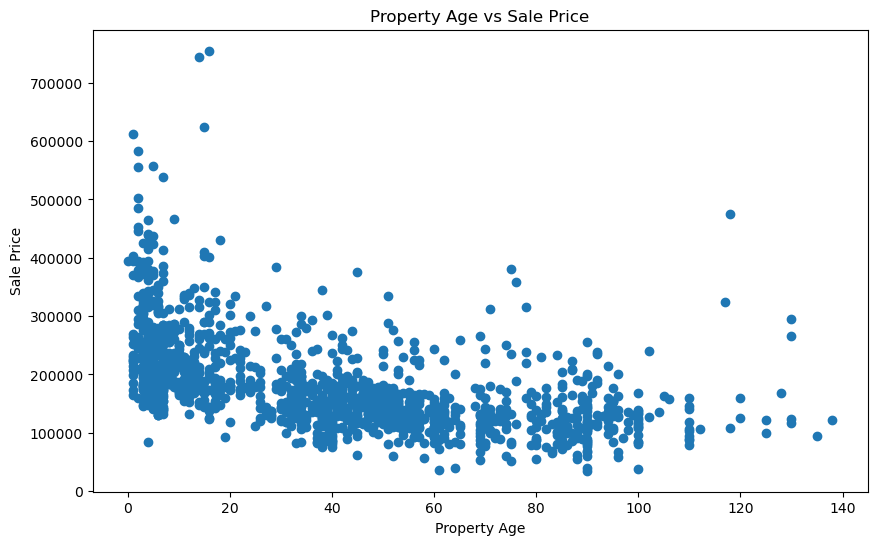

In [12]:
df['PropertyAge'] = df['YrSold'].max() - df['YearBuilt']

# Calculate correlation
corr = df['PropertyAge'].corr(df['SalePrice'])
print(f'Correlation between Property Age and Sale Price: {corr}')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PropertyAge'], df['SalePrice'])
plt.title('Property Age vs Sale Price')
plt.xlabel('Property Age')
plt.ylabel('Sale Price')
plt.show()

Correlation between Living Area and Sale Price: 0.7086244776126523


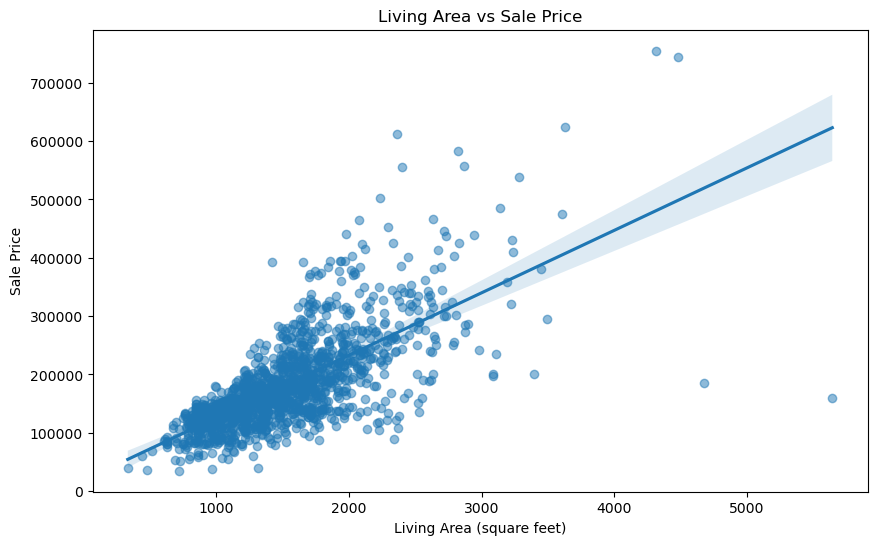

In [13]:
corr = df['GrLivArea'].corr(df['SalePrice'])
print(f'Correlation between Living Area and Sale Price: {corr}')

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'alpha':0.5})
plt.title('Living Area vs Sale Price')
plt.xlabel('Living Area (square feet)')
plt.ylabel('Sale Price')
plt.show()

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

In [15]:
# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice']) #normalize dependent variable 
X_preprocessed = pipeline.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2)

In [18]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'SVR':SVR()
}

In [19]:
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    },
    'SVR':{
        'kernel':["rbf","linear","poly"],
        "C": [1.0,0.5,5.0],
        "gamma":["scale","auto"]
    }
}

cv = KFold(n_splits=3, shuffle=True)

grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 3752813942.8759985

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best parameters for RandomForest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.14701720040204294

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.12957434258892198

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for SVR: {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Best RMSE for SVR: 0.12584931832311416



In [20]:
from sklearn.neural_network import MLPRegressor

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh',"sigmoid"],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01,0.1],
    'learning_rate': ['constant', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp.fit(X_train_scaled, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


96 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site

Best parameters found:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.2360848981490367


In [21]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

X_pca = pipeline_pca.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'SVR':SVR()
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 3, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3,0.5],
        'max_depth': [3, 6, 10]
    },
    'SVR':{
        'kernel':["rbf","linear","poly","sigmoid"],
        "C": [1.0,0.5,3.0],
        "gamma":["scale","auto"]
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True)

# Train and tune the models
grids_pca = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_pca[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_pca[model_name].fit(X_train_pca, y_train_pca)
    best_params = grids_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1536195378077369

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best RMSE for RandomForest: 0.15155079181664385

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END .................................................... total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   6.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=500; total time=  15.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=500; total time=  13.1s
[CV] END max_depth=None, min_samples_split=10, n_estimators=500; total time=  10.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   5.1s


In [23]:
from sklearn.neural_network import MLPRegressor

X_train_scaled_pca = X_train_pca.copy()
X_test_scaled_pca = X_test_pca.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh',"sigmoid"],
    'solver': ['adam',"sgd",],
    'alpha': [0.0001, 0.001, 0.01, .1, 1],
    'learning_rate': ['constant', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp_pca = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_pca.fit(X_train_scaled_pca, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_pca.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_pca.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
142 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/si

Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.40983569222384186


In [24]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids[i].predict(X_test), y_test))))

LinearRegression: 54776796003.73967
RandomForest: 0.14615203206943972
XGBoost: 0.13300204783263042
SVR: 0.14049239197691116


In [25]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_pca[i].predict(X_test_pca), y_test))))

LinearRegression: 0.5470067345558178
RandomForest: 0.5310548369552743
XGBoost: 0.540822568157959
SVR: 0.5439478402240107


In [26]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp_pca.predict(X_test_scaled_pca),y_test))))

0.3905313901153258


In [27]:
from sklearn.preprocessing import FunctionTransformer
def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object) 
    return df_out
feature_engineering_transformer = FunctionTransformer(custom_features)

In [28]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath'])

# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', pca)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [29]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'SVR': SVR()
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    },
    'SVR':{
        'kernel':["rbf","linear","poly","sigmoid"],
        "C": [1.0,0.5,3.0],
        "gamma":["scale","auto"]
    }
}

# fold cross-validation
cv = KFold(n_splits=3, shuffle=True)

# Train and tune the models
grids_fe = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_fe[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_fe[model_name].fit(X_train_fe, y_train_fe)
    best_params = grids_fe[model_name].best_params_
    best_score = np.sqrt(-1 * grids_fe[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.151535804360673

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best RMSE for RandomForest: 0.14949558164933927

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13348610947055436

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=200; total time=   1.9s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=200; total time=   1.9s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=500; total time=  12.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   6.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200;

In [30]:
X_train_scaled_fe = X_train_fe.copy()
X_test_scaled_fe = X_test_fe.copy()

# Create an MLPRegressor instance
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10), (10, 10), (10, 25)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam', 'sgd'],
    'alpha': [.1, .5, 1, 10, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.1]
}

# Create the GridSearchCV object
from sklearn.model_selection import GridSearchCV
grid_search_mlp_fe = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_fe.fit(X_train_scaled_fe, y_train_fe)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_fe.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_fe.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  re

Best parameters found:  {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'adam'}
Test score:  0.12633244567768592


In [31]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_fe[i].predict(X_test_fe), y_test))))

LinearRegression: 0.5471942075216625
RandomForest: 0.5400478895209347
XGBoost: 0.5398220267503171
SVR: 0.5440640723160851


In [32]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp_fe.predict(X_test_scaled_fe),y_test))))

0.5584084590980442


In [33]:
df_test = pd.read_csv("/kaggle/input/housing/test.csv")

In [34]:
df_test_preprocessed = pipeline_fe.transform(df_test)

In [35]:
y_xgboost = np.exp(grids_fe['XGBoost'].predict(df_test_preprocessed))

df_xgboost_out = df_test[['Id']].copy()
df_xgboost_out['SalePrice'] = y_xgboost

#
df_xgboost_out.to_csv('submission_xgboost_new_features_normalized.csv', index=False)

In [36]:
y_rf = np.exp(grids_fe['RandomForest'].predict(df_test_preprocessed))

df_rf_out = df_test[['Id']].copy()
df_rf_out['SalePrice'] = y_rf

#
df_rf_out.to_csv('submission_rf_normalized.csv', index=False)

In [37]:
y_mlp = np.exp(grid_search_mlp_fe.predict(df_test_preprocessed))

df_mlp_out = df_test[['Id']].copy()
df_mlp_out['SalePrice'] = y_mlp

df_mlp_out.to_csv('submission_mlp_normalized.csv', index=False)

In [38]:
y_svr = np.exp(grid_search_mlp_fe.predict(df_test_preprocessed))

df_svr_out = df_test[['Id']].copy()
df_svr_out['SalePrice'] = y_svr

df_svr_out.to_csv('submission_svr_normalized.csv', index=False)

In [39]:
y_avg_ens = (y_rf + y_xgboost + y_mlp+y_svr)/4

#xgboost submission
df_avg_ens_out = df_test[['Id']].copy()
df_avg_ens_out['SalePrice'] = y_avg_ens

#
df_avg_ens_out.to_csv('submission_avg_ens_new_features_normalized.csv', index=False)